In [1]:
import pandas as pd
import numpy as np
from process import *

In [2]:
# Instantiate helper
ftp_h = FTPHelper(URL, USERNAME, PASSWORD)

In [3]:
# Create a pandas.df to store the list of available files.
df = pd.DataFrame(data=ftp_h.list_files(), columns=["name"])

# Rearrange the content of the pandas df.
df = pd.concat([df, df["name"].str.split("_", expand=True)], axis=1)
df = df.rename(columns = {
    0:"dataset", 1:"version", 2:"res", 3:"filetype", 4:"crs", 
    5:"dep", 6:"date"})

# Loc the dataset of interest RGE Alti 5m.
df = df.loc[(df.dataset == "RGEALTI") & (df.res == "1M")]

# Clean the date and set the name as index.
df['date'] = df['date'].apply(lambda x:x[:-3])
df = df.set_index("name")

df

,dataset,version,res,filetype,crs,dep,date
name,,,,,,,
RGEALTI_2-0_1M_ASC_LAMB93-IGN69_D001_2020-11-13.7z,RGEALTI,2-0,1M,ASC,LAMB93-IGN69,D001,2020-11-13
RGEALTI_2-0_1M_ASC_LAMB93-IGN69_D002_2020-09-04.7z,RGEALTI,2-0,1M,ASC,LAMB93-IGN69,D002,2020-09-04
RGEALTI_2-0_1M_ASC_LAMB93-IGN69_D003_2021-08-25.7z,RGEALTI,2-0,1M,ASC,LAMB93-IGN69,D003,2021-08-25
RGEALTI_2-0_1M_ASC_LAMB93-IGN69_D004_2021-08-04.7z.001,RGEALTI,2-0,1M,ASC,LAMB93-IGN69,D004,2021-08-04.7z.
RGEALTI_2-0_1M_ASC_LAMB93-IGN69_D004_2021-08-04.7z.002,RGEALTI,2-0,1M,ASC,LAMB93-IGN69,D004,2021-08-04.7z.
...,...,...,...,...,...,...,...
RGEALTI_2-0_1M_ASC_RGR92UTM40S-REUN89_D974_2016-03-11.7z,RGEALTI,2-0,1M,ASC,RGR92UTM40S-REUN89,D974,2016-03-11
RGEALTI_2-0_1M_ASC_RGSPM06U21-STPM50_D975_2017-03-27.7z,RGEALTI,2-0,1M,ASC,RGSPM06U21-STPM50,D975,2017-03-27
RGEALTI_2-0_1M_ASC_WGS84UTM20-GUAD88_D971_2014-01-15.7z,RGEALTI,2-0,1M,ASC,WGS84UTM20-GUAD88,D971,2014-01-15


In [5]:
ROI = "Occitanie"

deps_of_interest = REGIONS[ROI]
deps_of_interest = ["D0"+dn for dn in deps_of_interest]

# Loc lines of interest in the pandas.df.
dfi = df.loc[df.dep.isin(deps_of_interest)]
filenames = dfi.index.to_list()
filenames = [
 'RGEALTI_2-0_1M_ASC_LAMB93-IGN69_D012_2020-07-10.7z',
 'RGEALTI_2-0_1M_ASC_LAMB93-IGN69_D030_2021-11-02.7z',
 'RGEALTI_2-0_1M_ASC_LAMB93-IGN69_D031_2021-05-12.7z',
 'RGEALTI_2-0_1M_ASC_LAMB93-IGN69_D032_2019-11-21.7z',
 'RGEALTI_2-0_1M_ASC_LAMB93-IGN69_D034_2021-05-12.7z',
 'RGEALTI_2-0_1M_ASC_LAMB93-IGN69_D046_2019-10-17.7z',
 'RGEALTI_2-0_1M_ASC_LAMB93-IGN69_D048_2020-07-10.7z',
 'RGEALTI_2-0_1M_ASC_LAMB93-IGN69_D065_2020-02-11.7z',
 'RGEALTI_2-0_1M_ASC_LAMB93-IGN69_D066_2021-05-12.7z',
 'RGEALTI_2-0_1M_ASC_LAMB93-IGN69_D081_2021-03-24.7z',
 'RGEALTI_2-0_1M_ASC_LAMB93-IGN69_D082_2019-10-30.7z']

In [ ]:
for num, filename in enumerate(filenames):
    if filename in os.listdir(TEMP_ZIP):
        print(filename, "already downloaded")
    else:
        ftp_h.download_file(filename, TEMP_ZIP)

In [5]:


    extract_rge(filename)
    print(filename, "is now ewtracted.")
    asc_paths_list = get_path_asc_paths(filename)
    print("asc paths are now into a list.")
    result_path = os.path.join(DATAPATH, "result")
    mosaic_name = f"mymosaic_{ROI}_{num+1}.tif"
    print("mosaic started.")
    mosaic_paths = create_rge_mosaic(asc_paths_list, result_path, mosaic_name, 2154)
    print("mosaic finished.")

    

RGEALTI_2-0_1M_ASC_LAMB93-IGN69_D001_2020-11-13.7z already downloaded
data/temp7z/RGEALTI_2-0_1M_ASC_LAMB93-IGN69_D001_2020-11-13.7z is extracted to data/RGE_ALTI_1m.
RGEALTI_2-0_1M_ASC_LAMB93-IGN69_D001_2020-11-13.7z is now ewtracted.
asc paths are now into a list.
mosaic started.
starting to convert asc files to tiffs.
All asc files are now converted.
Merging process ongoing...
Merging process of mymosaic_Auvergne-Rhône-Alpes_1sub1.tif done!
Merging process of mymosaic_Auvergne-Rhône-Alpes_1sub2.tif done!
Merging process of mymosaic_Auvergne-Rhône-Alpes_1sub3.tif done!
Merging process of mymosaic_Auvergne-Rhône-Alpes_1sub4.tif done!
Merging process of mymosaic_Auvergne-Rhône-Alpes_1sub5.tif done!
Merging process of mymosaic_Auvergne-Rhône-Alpes_1sub6.tif done!
tmp dir purged!
mosaic finished.
RGEALTI_2-0_1M_ASC_LAMB93-IGN69_D003_2021-08-25.7z already downloaded
data/temp7z/RGEALTI_2-0_1M_ASC_LAMB93-IGN69_D003_2021-08-25.7z is extracted to data/RGE_ALTI_1m.
RGEALTI_2-0_1M_ASC_LAMB93-I

RasterioIOError: data/result/mymosaic_Auvergne-Rhône-Alpes_2sub2.tif: Free disk space available is 1101385728 bytes, whereas 6776000000 are at least necessary. You can disable this check by defining the CHECK_DISK_FREE_SPACE configuration option to FALSE.

In [6]:
filename = filenames[0]

In [7]:
asc_paths_list = get_path_asc_paths(filename)

In [8]:
#extract_rge(filename)
print(filename, "is now ewtracted.")
asc_paths_list = get_path_asc_paths(filename)
print("asc paths are now into a list.")
result_path = os.path.join(DATAPATH, "result")
mosaic_name = f"mymosaic_{ROI}_{num+1}.tif"
print("mosaic started.")
mosaic_paths = create_rge_mosaic(asc_paths_list, result_path, mosaic_name, 2154)
print("mosaic finished.")

RGEALTI_2-0_1M_ASC_LAMB93-IGN69_D001_2020-11-13.7z is now ewtracted.
asc paths are now into a list.
mosaic started.
tiffs are already created.
Merging process ongoing...
Merging process of mymosaic_Auvergne-Rhône-Alpes_14sub1.tif done!
Merging process of mymosaic_Auvergne-Rhône-Alpes_14sub2.tif done!
Merging process of mymosaic_Auvergne-Rhône-Alpes_14sub3.tif done!
Merging process of mymosaic_Auvergne-Rhône-Alpes_14sub4.tif done!
Merging process of mymosaic_Auvergne-Rhône-Alpes_14sub5.tif done!
Merging process of mymosaic_Auvergne-Rhône-Alpes_14sub6.tif done!
tmp dir purged!
mosaic finished.


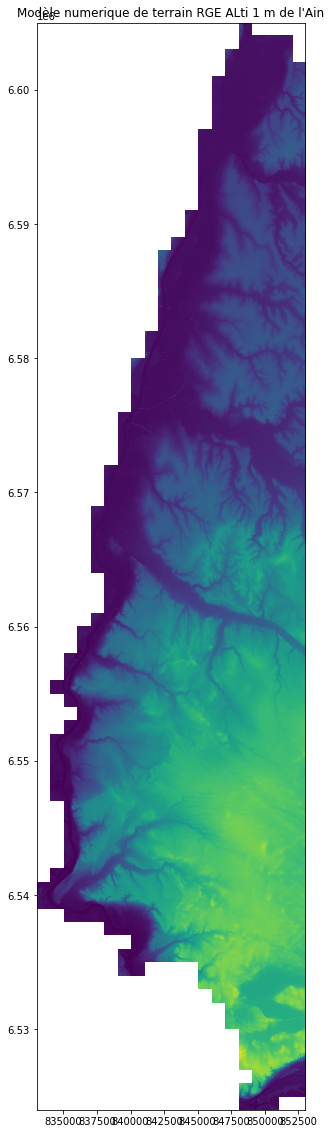

In [10]:
mosaic_path = "data/result/mymosaic_Auvergne-Rhône-Alpes_14._sub1.tif"

import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
%matplotlib inline 

fig, ax = plt.subplots(1, figsize=(20, 20))

# PLot the mosaic of the 2A departement.
with rasterio.open(mosaic_path) as img:
    show(img, interpolation='none', ax=ax)

plt.title("Modèle numerique de terrain RGE ALti 1 m de l'Ain")
plt.show()

In [ ]:
    extract_rge(filename)
asc_paths_list = get_path_asc_paths(filename)
result_path = os.path.join(DATAPATH, "result")
mosaic_name = f"mymosaic_{ROI}_{num+1}.tif"
mosaic_path = create_rge_mosaic(asc_paths_list, result_path, mosaic_name, 2154)